# Practical 2 Machine Learning 3
### Gadegbeku Fabio

## Preliminaries


In [2]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import copy

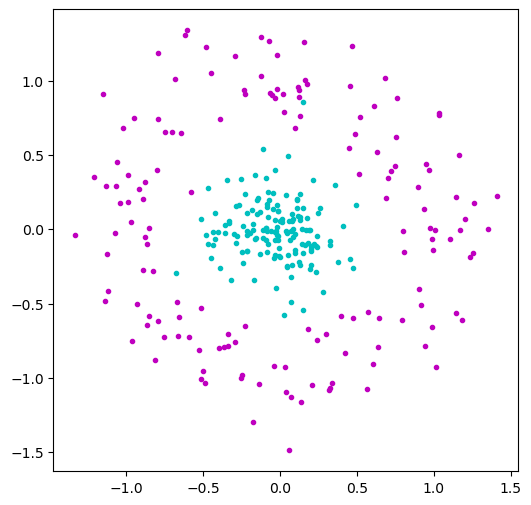

In [3]:
X,y = make_circles(n_samples = 300, noise=0.2, factor=0.1)
n,d = X.shape
plt.figure(1,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.c')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.m')

In [4]:
def sigmoid(x):
    res = 1 / (1 + np.exp(-x))
    return res

## Exercise 1

### Question 1.1

In [5]:
class InputUnit:
    def __init__(self,data):
        self.data = data #one column of matrix X
        self.n = data.shape[0] #dataset size
        self.k = 0 #layer number
        self.z = 0 #unit output
        self.following = []
        self.nfo = 0
    def plug(self,following):
            for elt in following:
                self.following.append(elt)
                self.nfo += 1
    def forward(self,i):
        self.z = self.data[i]
        return self.z

In [6]:
input1 = InputUnit(X[:,0])
input2 = InputUnit(X[:,1])

### Question 1.2

In [7]:
class NeuralUnit:
    #Constructor
    def __init__(self,k,u):
        self.u = u #unit number
        self.preceding = [] #list of preceding neurons
        self.npr = 0 #length of list preceding
        self.following = [] #list of following neurons
        self.nfo = 0 #length of list following
        self.k = k #layer number
        self.w = 0 #unit weights
        self.b = 0 #unit intercept
        self.z = 0 #unit output
        
    def reset_params(self):
        self.w = np.random.randn(self.npr)
        self.b = np.random.randn()
    def plug(self,preceding,following):
        for elt in preceding:
            self.preceding.append(elt)
            self.npr += 1
        for elt in following:
            self.following.append(elt)
            self.nfo += 1

    def forward(self,i):
        z_in = np.zeros(self.npr)
        for j in range(self.npr):
            z_in[j]= self.preceding[j].forward(i)
        self.z = sigmoid(np.dot(self.w.T,z_in)+self.b)
        return(self.z)
        
    def backprop(self,i,deltas):
        self.delta = np.zeros(self.w.shape)
        self.w_grad = np.zeros(self.w.shape)
        self.b_grad = 0
        for v,prec_unit in enumerate(self.preceding):
            self.delta[v]= self.z*(1-self.z)*self.w[v]*deltas[self.u]
            self.w_grad[v]= self.z*(1-self.z)*prec_unit.z*deltas[self.u]
            self.b_grad = self.z*(1-self.z)*deltas[self.u]

        
        

In [8]:
NeuralUnit1_1 = NeuralUnit(1,1)
NeuralUnit1_2 = NeuralUnit(1,2)
NeuralUnit2_1 = NeuralUnit(2,1)

### Question 1.3 

In [9]:
class Loss:
    #Constructor
    def __init__(self,y,k):
        self.preceding = [] #list of preceding neurons
        self.npr = 0 #length of list preceding
        self.y = y #array of class labels of the training data
        self.k = k #layer index
        self.delta = np.zeros((1,))

    def plug(self,preceding):
        for elt in preceding:
            self.preceding.append(elt)
            self.npr += 1

    def forward(self,i):
        z_in = self.preceding[0].forward(i)
        li = -(1-self.y[i])*np.log(1-z_in) - self.y[i]*np.log(z_in)
        return li
    def backprop(self,i):
        z_in = self.preceding[0].forward(i)
        self.delta[0]=(1-self.y[i])*1/(1-z_in) -y[i]*1/z_in



In [10]:
H = Loss(y,3)

### Question 1.4

### Question 1.5

In [11]:
class MLP:
#Constructor
    def __init__(self,X,y,archi):
        self.archi = archi
        self.X = X
        self.n = X.shape[0]
        self.y = y
        self.K = len(archi) #number of layers (including input layer but omitting loss layer)
        #creating network
        net = []
        for k in range(self.K):
            if k == 0:
                input_units = []
                for i in range(archi[k]):
                    input_unit = InputUnit(X[:,i])
                    input_units.append(input_unit)
                net.append(input_units)
            elif k == self.K-1:
                    loss = Loss(y,k)
                    net.append([loss])
            else:
                neural_units = []
                for i in range(archi[k]):
                    neural_unit = NeuralUnit(k,i)
                    neural_units.append(neural_unit)
                net.append(neural_units)

        #plugging units
        for k in range(self.K):
            if k == 0:
                for input_unit in net[k]:
                    input_unit.plug(net[k+1])
            elif k == self.K-1:
                for loss in net[k]:
                    loss.plug(net[k-1])
            else:
                for neural_unit in net[k]:
                    neural_unit.plug(net[k-1],net[k+1])
                    neural_unit.reset_params()

        self.net = net

    def forward(self,i):
        res = self.net[self.K-1][0].forward(i)
        return res
    
    def backprop(self,i):
        for k in range(self.K-1,0,-1):
            if k == self.K-1:
                self.net[k][0].backprop(i)
                deltas = self.net[k][0].delta
            else:
                deltas_new = np.zeros((self.net[k][0].npr,))
                for u in range(len(self.net[k])):
                    self.net[k][u].backprop(i,deltas)
                    deltas_new+=self.net[k][u].delta
                deltas = deltas_new

    def train(self, epochs,eta):
        for epoch in range(epochs):
            for i in range(self.n):
                self.forward(i)
                self.backprop(i)
                self.update(eta)

    def predict(self,i):
        res = self.net[self.K-2][0].forward(i)
        return res
    
    def update(self,eta):
        for k in range(1,self.K-1):
            for neural_unit in self.net[k]:
                neural_unit.w -= eta*neural_unit.w_grad
                neural_unit.b -= eta*neural_unit.b_grad
        

        




            

        

In [12]:
mlp = MLP(X,y,[2,2,1,1]) #it's easier for me to incorporate the loss layer in the network
print('The network is composed of',mlp.K -1,'layers')
print('The full network is :',mlp.net)
print('The followings of the first input unit of first layer are :',mlp.net[0][0].following)
print('The followings of first neural unit of first layer are :',mlp.net[1][0].following)
print('The precedings of the first neural unit of the first layer are:',mlp.net[1][0].preceding)
print('The precedings of loss layer are:',mlp.net[3][0].preceding)  
print('random weights of first neural unit of first layer are:',mlp.net[1][0].w,mlp.net[1][0].b)

The network is composed of 3 layers
The full network is : [[<__main__.InputUnit object at 0x169bd57d0>, <__main__.InputUnit object at 0x169bd6950>], [<__main__.NeuralUnit object at 0x169bdc250>, <__main__.NeuralUnit object at 0x169bdc5d0>], [<__main__.NeuralUnit object at 0x169bdc4d0>], [<__main__.Loss object at 0x169bde190>]]
The followings of the first input unit of first layer are : [<__main__.NeuralUnit object at 0x169bdc250>, <__main__.NeuralUnit object at 0x169bdc5d0>]
The followings of first neural unit of first layer are : [<__main__.NeuralUnit object at 0x169bdc4d0>]
The precedings of the first neural unit of the first layer are: [<__main__.InputUnit object at 0x169bd57d0>, <__main__.InputUnit object at 0x169bd6950>]
The precedings of loss layer are: [<__main__.NeuralUnit object at 0x169bdc4d0>]
random weights of first neural unit of first layer are: [-0.79456761 -2.01158755] 0.6499924215585995


## Exercise 2

### Question 2.1

In [13]:
#   def forward(self,i):
#         self.z = self.data[i]
#         return self.z

### Question 2.2

In [14]:
#   def forward(self,i):
#         z_in = np.zeros(self.npr)
#         for j in range(self.npr):
#             z_in[j]= self.preceding[j].forward(i)
#         self.z = sigmoid(np.dot(self.w.T,z_in)+self.b)
#         return(self.z)
        

### Question 2.3

In [15]:
#   def forward(self,i):
#         z_in = self.preceding[0].forward(i)
#         li = -(1-self.y[i])*np.log(1-z_in) - self.y[i]*np.log(z_in)
#         return li

### Question 2.4

In [16]:
    # def forward(self,i):
    #     res = self.net[self.K-1][0].forward(i)
    #     return res
            
print('The correct label is :',y[0])
print('The output of the layer 2 neural unit is :',mlp.net[2][0].forward(0))
print('The loss is :',mlp.forward(0))

The correct label is : 0
The output of the layer 2 neural unit is : 0.3170286644066126
The loss is : 0.3813023886765429


## Exercise 3 

### Question 3.1

In [17]:
#   def backprop(self,i):
#         z_in = self.preceding[0].forward(i)
#         self.delta[0]=(1-self.y[i])*1/(1-z_in) -y[i]*1/z_in

### Question 3.2

In [18]:
    # def backprop(self,i,deltas):
    #     self.delta = np.zeros(self.w.shape)
    #     self.w_grad = np.zeros(self.w.shape)
    #     self.b_grad = 0
    #     for v,prec_unit in enumerate(self.preceding):
    #         self.delta[v]= self.z*(1-self.z)*self.w[v]*deltas[self.u]
    #         self.w_grad[v]= self.z*(1-self.z)*prec_unit.z*deltas[self.u]
    #         self.b_grad = self.z*(1-self.z)*deltas[self.u]

### Qustion 3.3

In [19]:
#    def backprop(self,i):
#         for k in range(self.K-1,0,-1):
#             if k == self.K-1:
#                 self.net[k][0].backprop(i)
#                 deltas = self.net[k][0].delta
#             else:
#                 deltas_new = np.zeros((self.net[k][0].npr,))
#                 for u in range(len(self.net[k])):
#                     self.net[k][u].backprop(i,deltas)
#                     deltas_new+=self.net[k][u].delta
#                 deltas = deltas_new

### Question 3.4

In [20]:
i = 0
archi = [d,10,1,1]
mlp = MLP(X,y,archi)
mlp.forward(i)
mlp.backprop(i)
epsi=1e-3
mlp2 = copy.deepcopy(mlp)
mlp2.net[1][0].w[0] = mlp.net[1][0].w[0] + epsi
print("numerical derivative is:",(mlp2.forward(i) - mlp.forward(i))/epsi)
print("computed derivative is:",mlp.net[1][0].w_grad[0])

numerical derivative is: -0.013613513538429656
computed derivative is: -0.013611982076933225


## Exercise 4

### Question 1

In [21]:
#  def update(self,eta):
#         for k in range(1,self.K-1):
#             for neural_unit in self.net[k]:
#                 neural_unit.w -= eta*neural_unit.w_grad
#                 neural_unit.b -= eta*neural_unit.b_grad

### Question 2

In [22]:
mlp.train(100,0.01)

### Question 3

In [23]:
#   def predict(self,i):
#         res = self.net[self.K-2][0].forward(i)
#         return res

### Question 4

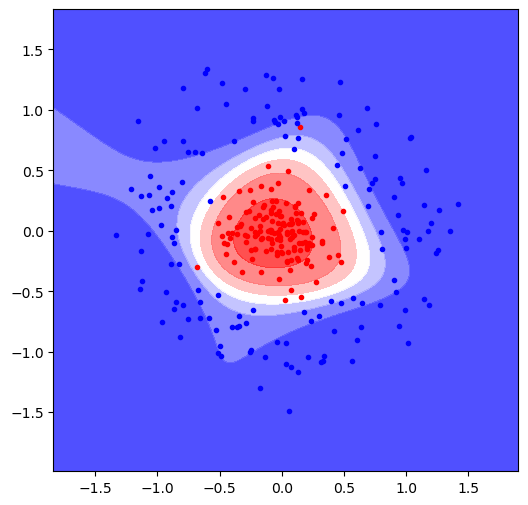

In [24]:
h = .02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),
                        np.arange(x2_min, x2_max, h))
X_disp = np.c_[x11.ravel(), x22.ravel()]
n_disp = X_disp.shape[0]
Z = []
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X_disp[:,u]
for i in range(n_disp):
    Z.append(mlp.predict(i))
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X[:,u]
Z = np.array(Z)
Z = Z.reshape(x11.shape)
plt.figure(2,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b')
plt.contourf(x11, x22, Z, cmap=plt.cm.bwr, alpha=.8)